In [51]:
import numpy as np
import pandas as py
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from pylab import rcParams
import matplotlib.pyplot as plt
import seaborn as sb

In [32]:
data = pd.read_csv('strongdrink.txt')

a)

In [33]:
data

,cultivar,alco,malic,ash,alk,magn,tot_phen,flav,nonfl_phen,proanth,color_int,hue,OD280rat,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
172,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
173,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
174,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [43]:
al_cl1 = data[data['cultivar'] == 1].iloc[:, [1, 10]]
al_cl2 = data[data['cultivar'] == 2].iloc[:, [1, 10]]
al_cl3 = data[data['cultivar'] == 3].iloc[:, [1, 10]]

g1 = (al_cl1.iloc[:, 0].values, al_cl1.iloc[:, 1].values)
g2 = (al_cl2.iloc[:, 0].values, al_cl2.iloc[:, 1].values)
g3 = (al_cl3.iloc[:, 0].values, al_cl3.iloc[:, 1].values)

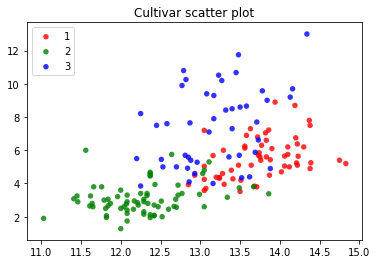

In [53]:
pts = (g1, g2, g3)
colors = ("red", "green", "blue")
groups = ("1", "2", "3")

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for dts, color, group in zip(pts, colors, groups):
    x, y = dts
    ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)

plt.title('Cultivar scatter plot')
plt.legend(loc=2)
plt.show()

b)

In [60]:
data = pd.read_csv('strongdrink.txt')
Xvars = data.iloc[:, [1, 2, 6, 10]].values
yvars = data.iloc[:, 0].values

In [63]:
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform as sp_uniform

In [75]:
param_dist1 = {'penalty': ['l1', 'l2'],
               'C': sp_uniform(0.1, 10.0)}

In [77]:
logreg = LogisticRegression()
random_search1 = \
    RandomizedSearchCV(logreg, param_distributions=param_dist1,
                       n_iter=200, n_jobs=-1, cv=5, random_state=25,
                       scoring='neg_mean_squared_error')

In [78]:
random_search1.fit(Xvars, yvars)
print('logregRandBestEstimator=', random_search1.best_estimator_)
print('logregRandBestParams=', random_search1.best_params_)
print('logreg_MSE=', -random_search1.best_score_)

logregRandBestEstimator= LogisticRegression(C=9.565064414817147, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
logregRandBestParams= {'C': 9.565064414817147, 'penalty': 'l2'}
logreg_MSE= 0.09571428571428572


c)

In [79]:
from scipy.stats import randint as sp_randint


In [80]:
param_dist2 = {'n_estimators': sp_randint(10, 200),
               'max_depth': sp_randint(2, 4),
               'min_samples_split': sp_randint(2, 20),
               'min_samples_leaf': sp_randint(2, 20),
               'max_features': sp_randint(1, 4)}

In [83]:
rndtree = RandomForestClassifier()
random_search2 = \
    RandomizedSearchCV(rndtree, param_distributions=param_dist2,
                       n_iter=200, n_jobs=-1, cv=5, random_state=25,
                       scoring='neg_mean_squared_error')

In [85]:
random_search2.fit(Xvars, yvars)
print('rtreeRandBestEstimator=', random_search2.best_estimator_)
print('rtreeRandBestParams=', random_search2.best_params_)
print('rtree_MSE=', -random_search2.best_score_)

rtreeRandBestEstimator= RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features=1,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=18,
                       min_weight_fraction_leaf=0.0, n_estimators=198,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
rtreeRandBestParams= {'max_depth': 3, 'max_features': 1, 'min_samples_leaf': 5, 'min_samples_split': 18, 'n_estimators': 198}
rtree_MSE= 0.13031746031746033


d)

In [89]:
from scipy.stats import uniform as sp_uniform
from sklearn import svm, datasets

In [90]:
param_dist3 = {'C': sp_uniform(loc=0.1, scale=10.0),
               'gamma': ['scale', 'auto'],
               'shrinking': [True, False]}

In [91]:
auto_svm = svm.SVC(kernel='rbf')
random_search3 = \
    RandomizedSearchCV(auto_svm, param_distributions=param_dist3,
                       n_iter=200, n_jobs=-1, cv=5, random_state=25,
                       scoring='neg_mean_squared_error')

In [93]:
random_search3.fit(Xvars, yvars)
print('svmRandBestEstimator=', random_search3.best_estimator_)
print('svmRandBestParams=', random_search3.best_params_)
print('svm_MSE=', -random_search3.best_score_)

svmRandBestEstimator= SVC(C=8.801241366272118, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=False, tol=0.001, verbose=False)
svmRandBestParams= {'C': 8.801241366272118, 'gamma': 'scale', 'shrinking': False}
svm_MSE= 0.1461904761904762


e)

In [95]:
param_dist4 = {'hidden_layer_sizes': sp_randint(1, 100),
               'activation': ['logistic', 'relu'],
               'alpha': sp_uniform(0.1, 10.0)}

In [98]:
mlpnn = MLPClassifier()
random_search4 = \
    RandomizedSearchCV(mlpnn, param_distributions=param_dist4,
                       n_iter=200, n_jobs=-1, cv=5, random_state=25,
                       scoring='neg_mean_squared_error')

In [99]:
random_search4.fit(Xvars, yvars)
print('mlpnnRandBestEstimator=', random_search4.best_estimator_)
print('mlpnnRandBestParams=', random_search4.best_params_)
print('mlpnn_MSE=', -random_search4.best_score_)

mlpnnRandBestEstimator= MLPClassifier(activation='relu', alpha=7.09186237944441, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=51, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
mlpnnRandBestParams= {'activation': 'relu', 'alpha': 7.09186237944441, 'hidden_layer_sizes': 51}
mlpnn_MSE= 0.20857142857142855


c:\users\pahadrianus\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


f)

Based on the MSE results of the three models, somewhat unexpectedly the logistic regression model performs the best. While it can be expected that going to classifications over 2 can quickly imparit the prediction of the random forest model, it is a bot suprising that the more sophisticated svm and neural network perform even worse